# Fakultät für Physik

## Physikalisches Praktikum P2 für Studierende der Physik

Versuch P2-13 (Stand: Mai 2024)

[Raum F1-09](https://labs.physik.kit.edu/img/Praktikum/Lageplan_P2.png)



# Interferenz

Name: Stier Vorname: Jonah E-Mail: uifed@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Name: Mutter Vorname: Raphael E-Mail: unodw@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Gruppennummer: Mo31

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}


Betreuer: Philip Schmid

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Versuch durchgeführt am: 17.06.2024

---

**Beanstandungen zu Protokoll Version _____:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Testiert am: __________________ Testat: __________________

# Durchführung

**Die Anleitung zu diesem Versuch finden Sie [hier](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Interferenz/README.md).**

In [23]:
import uncertainties.unumpy as unp
import uncertainties as u

from uncertainties import ufloat
import numpy as np
import kafe2
import matplotlib.pyplot as plt

import sympy

## Aufgabe 1: Newtonsche Ringe

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Interferenz/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Bestimmen Sie den Brechungsindex von Wasser, sowie den Brechungsindex der verwendeten Linse durch die Beobachtung von Newtonschen Ringen.
 * Bearbeiten Sie hierzu die folgenden Aufgaben.
 
---

### Aufgabe 1.1 Krümmungsradius $R$ einer ausgewählten Linse

Bestimmen Sie den Krümmungsradius $R$ einer symmetrischen, sphärischen, plankonvexen Linse aus der Beobachtung der Newtonschen Ringe unter dem Mikroskop.

---

Wir verwenden die Relation:

$$
r_k = \sqrt{k\,\lambda\,R} +c
$$


Zudem wurde ein Messfehler von $\Delta r = \pm 0.1\mathrm{mm}$ auf die Bestimmung des Ringradius angenommen.



C:\Users\jonah\AppData\Local\Temp\ipykernel_21108\638010011.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(R*k*yellow)+c
C:\Users\jonah\AppData\Local\Temp\ipykernel_21108\638010011.py:18: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(R*k*blue)+c


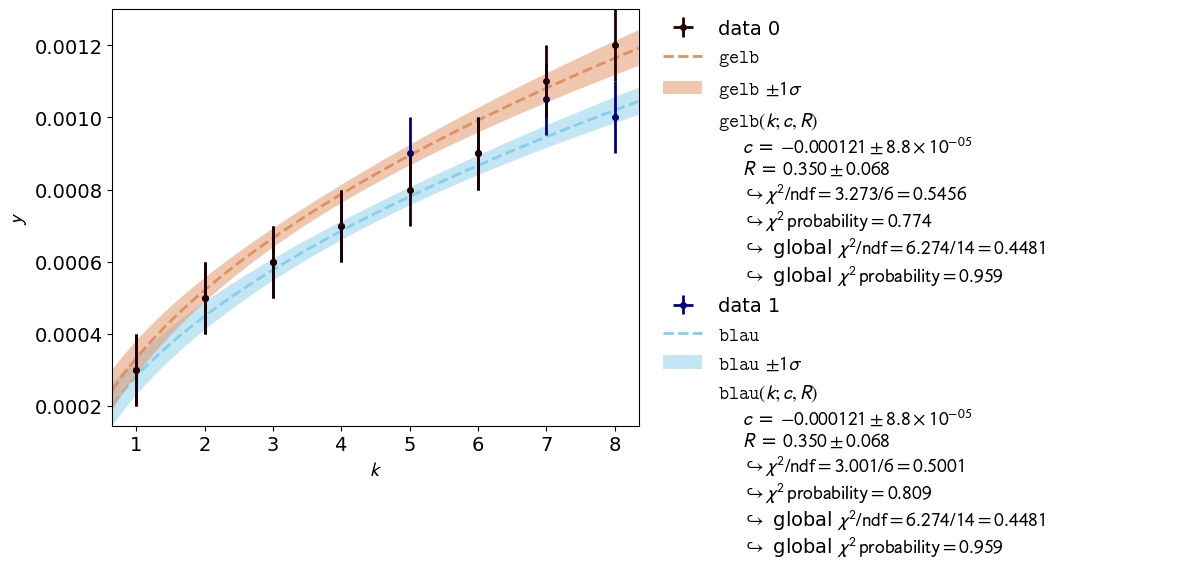

In [24]:
blaue_messreihe = np.array([11.4 - 11.1,11.5 - 11,11.5 - 10.9,11.6 - 10.9,11.7 - 10.8,11.7 - 10.8,11.8 - 10.75,11.7 - 10.7])*1e-3
blauer_fehler = 1e-4
gelbe_messreihe = np.array([30.1 - 29.8,30.2 - 29.7,30.2 - 29.6,30.3 - 29.6,30.3 - 29.5,30.4 - 29.5,30.5 - 29.4,30.6 - 29.4])*1e-3
gelber_fehler = 1e-4

blue = 465e-9
yellow = 590e-9

def gelb(k,c,R):
    return np.sqrt(R*k*yellow)+c

data = kafe2.XYContainer(np.arange(1,len(gelbe_messreihe)+1),gelbe_messreihe)
data.add_error('y',gelber_fehler)
fit = kafe2.Fit(data,gelb)


def blau(k,c,R):
    return np.sqrt(R*k*blue)+c
data2 = kafe2.XYContainer(np.arange(1,len(blaue_messreihe)+1),blaue_messreihe)
data2.add_error('y',blauer_fehler)
fit2 = kafe2.Fit(data2,blau)


multi = kafe2.MultiFit([fit,fit2])
multi.do_fit()
pl = kafe2.Plot(multi)
pl.plot()
plt.show()

R = ufloat(multi.parameter_values[1],multi.parameter_errors[1])

Damit erhalten wir einen Wert für den Krümmungsradius der Linse von $R_{Linse} = 350 \pm 68\, \mathrm{mm}$, was bei eienr $\chi^2$-Wahrscheinlihckeit von $0.959$ sehr realistisch erscheint und auf ein gutes Modell hinweist.

### Aufgabe 1.2 Brechungsindex $n(\mathrm{H_{2}O})$ von Wasser

Bestimmen Sie den Brechungsindex $n(\mathrm{H_{2}O})$ von Wasser aus den veränderten Durchmessern der Newtonschen Ringe, wenn sich zwischen Linse und Objektträger Wasser statt Luft befindet.

---

Unter verwendung eines Brechungsindex gilt:
$$
\lambda_{n} \to \frac{\lambda}{n}
$$

$$
r_k = \sqrt{\frac{k\,\lambda\,R}{n_w}} +c
$$

Da $R$ in der vorherigen Aufgabe bestimmt wurde, bleibt nur noch $n_{Wasser}$ als Unbekannte, welche durch einen Fit bestimmt werden kann. Es wurde gelbes Licht verwendet.

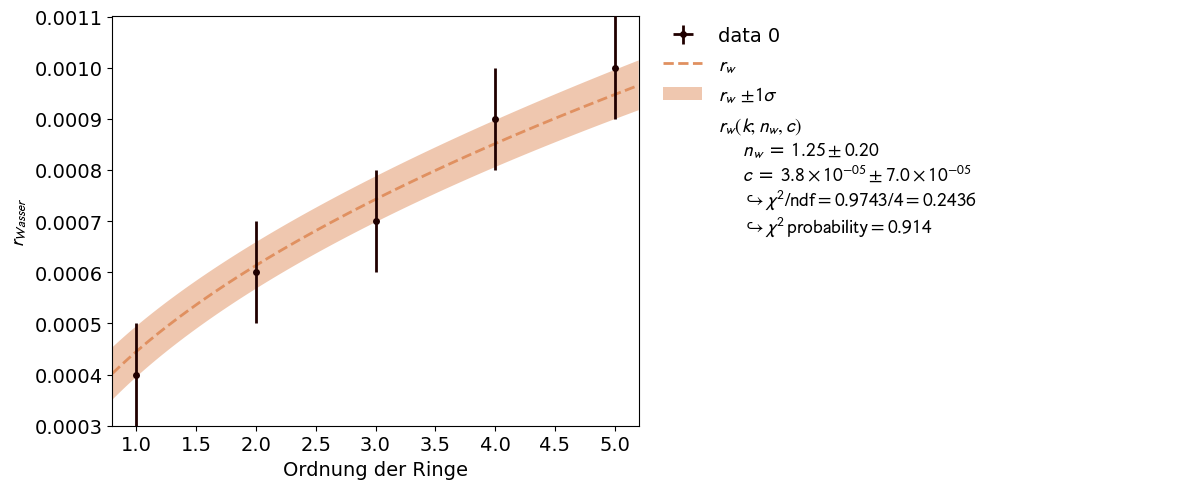

In [25]:
gelbwasser = np.array([32.0 - 31.6, 32.1 - 31.5, 32.1 - 31.4, 32.2 - 31.3, 32.2 - 31.2])*1e-3

yellow = 590e-9
gelber_fehler = 1e-4



def r_w(k,n_w,c):
    return (k*R.n/n_w*yellow)**(1/2)+c

r_squared2 = (unp.uarray(gelbwasser,1e-4)/2)**2/yellow
orders2 = np.arange(1,len(r_squared2)+1)

data3 = kafe2.XYContainer(np.arange(1,len(gelbwasser)+1),gelbwasser)
data3.add_error('y',gelber_fehler)
fit3 = kafe2.Fit(data3,r_w)
fit3.add_parameter_constraint('n_w',1.3,0.2)
fit3.do_fit()
p2 = kafe2.Plot(fit3)
p2.y_label = '$r_{Wasser}$'
p2.x_label = 'Ordnung der Ringe'
p2.plot()
n = ufloat(fit3.parameter_values[0],fit3.parameter_errors[0])
plt.show()

Der ermittelte Brechungsindex von Wasser liegt damit bei $n_w = 1.25 \pm 0.20$ und ist damit in Übereinstimmung mit dem Literautrwert von $n_w = 1.333$(Wikipedia)

### Aufgabe 1.3 Brechungsindex $n_{L}$ der verwendeten Linse

 * Bestimmen Sie den Brechungsindex $n_{L}$ der verwendeten Linse. 
 * Bestimmen Sie hierzu zusätzlich zu $R$ die Brennweite $f$ der Linse mit Hilfe eines Aufbaus zur [Autokollimation](https://de.wikipedia.org/wiki/Autokollimation).

---

Die Brennweite konnte mittels der Wegdifferenz zwischen der Linse und dem Schrim einfach abgelesen werden.

Um daraus den Brechungsindex zu bestimmen, wurde die Relation

$n_L = \frac{R}{f} + 1$

verwendet.

Der Krümmungsradius $R$ ist aus Aufgabe **1.1** bekannt.

In [26]:
f = [150-134.1, 150-134.5,150-134.7]
f = ufloat(np.mean(f),np.std(f))*0.01
n_L = R/f + 1
print(f'Brechungsindex Linse: {n_L}')

Brechungsindex Linse: 3.2+/-0.4


Der so gefundene Brechungsindex von $n_L = 3.2 \pm 0.4$ ist sehr viel Größer als der Literautrwert von $1.45$ bis $2.14$. Was darauf hindeutet, das es ein Fehler bei der Ablese der Messwerte gegeben haben muss.

## Aufgabe 2: Messungen mit dem Gitterspektrometer

**Hinweise zu Aufgabe 2 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Interferenz/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Bestimmen Sie Wellenlängen die dominanten Spektrallinien einer $\mathrm{Na}$- und einer $\mathrm{Zn}$-Spektrallampe mit Hilfe eines Gitterspektrometers.
 * Bearbeiten Sie hierzu die folgenden Aufgaben.
 
---


### Aufgabe 2.1: Justierung der Apparatur

 * Justieren Sie die Apparatur. 
 * Beschreiben Sie Ihr Vorgehen und dokumentieren Sie die wichtigsten numerischen Einstellungen. 

---

Zunächst wird das Fernrohr auf unendlich eingestellt indem es auf eine ausreichend weit entfernte Wand scharfgestellt wird. Anschließend wird das Gitter rechtwinklig zum Strahlengang ausgerichtet, dazu wurde nicht der Strahlteiler verwendet. Schließlich wird die Skala des Spektrometers bestmöglich auf null gesetzt indem das Fernrohr auf das nullte Maximum ausgerichtet wird. Anschließend wird die mittlere Drehscheibe so verdreht, dass die Nulllinien flüchtig sind. 

### Aufgabe 2.2: Bestimmung der Gitterkonstanten $g$ eines Gitters. 

 * Bestimmen Sie die Gitterkonstante $g$ des Gitter mit ${\approx}600$ Strichen pro $\mathrm{mm}$ mit Hilfe der $\mathrm{Na}$-Spektrallampe
 * Beachten Sie die Hinweise zu dieser Teilaufgabe in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Interferenz/doc/Hinweise-Versuchsdurchfuehrung.md) und beantworten Sie zur Vorbereitung der Messung die folgenden Fragen: 
     1. Unter welchen Winkeln erwarten Sie die Hauptmaxima?
     2. Werden diese u.U. durch Minima des Beugungsbilds am Einzelspalt ausgelöscht?
     3. Welche Breite erwarten Sie für die Maxima?
     4. Welches Intensitätsverhältnis erwarten Sie für die Maxima?
     5. Mit welcher Breite müssen Sie das Gitter beleuchten, um die $\mathrm{Na}$-D-Linien auflösen zu können?
 
---

0.0
20.706440936518888
45.004312401238806
Einzelspalt
0.0
18.555433008461193
39.527165712356506


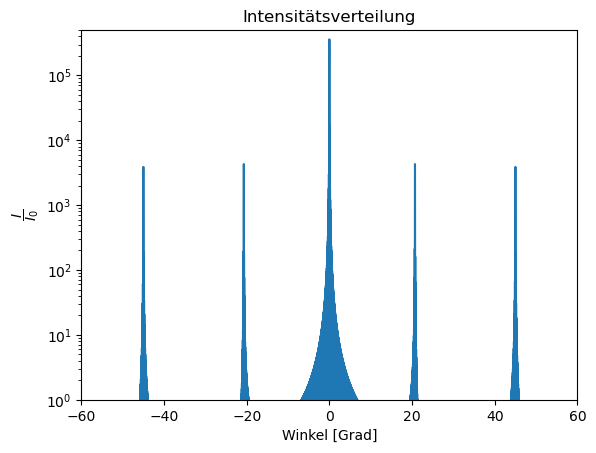

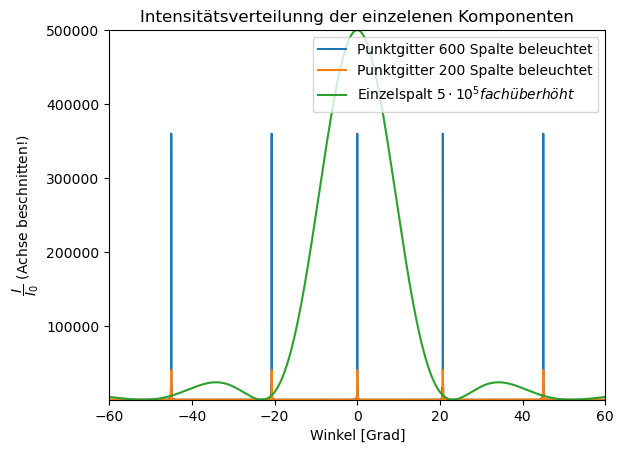

In [27]:
for n in range(0,3):
    print(np.arcsin(n*589.3e-9/(1e-3/600))*180/np.pi)
print("Einzelspalt")
for n in range(0,3):
    print(np.arcsin(n*589.3e-9/(1e-3/(0.9*600)))*180/np.pi)

def Itensit(alpha,b=1e-3/(600)*0.9,d=1e-3/600,N=600,lambd=589.3e-9):
    return ((np.sin(np.pi*(b/lambd)*np.sin(alpha)) /(np.pi*(b/lambd)*np.sin(alpha)) )**2 ) * (np.sin(N*np.pi*(d/lambd)*np.sin(alpha)) /np.sin(np.pi*(d/lambd)*np.sin(alpha)) )**2
def einzel(alpha,b=1e-3/(600)*0.9,d=1e-3/600,N=600,lambd=589.3e-9):
    return ((np.sin(np.pi*(b/lambd)*np.sin(alpha)) /(np.pi*(b/lambd)*np.sin(alpha)) )**2 )

def gitter(alpha,b=1e-3/(600)*0.9,d=1e-3/600,N=600,lambd=589.3e-9):
    return (np.sin(N*np.pi*(d/lambd)*np.sin(alpha)) /np.sin(np.pi*(d/lambd)*np.sin(alpha)) )**2

alph=np.linspace(-2*np.pi,2*np.pi,1000000)
plt.plot(alph*180/np.pi,Itensit(alph))
plt.xlim(-60,60)
plt.ylim(1,500000)

plt.title("Intensitätsverteilung")
plt.xlabel("Winkel [Grad]")

plt.ylabel("$ \dfrac{I}{I_0}$")
plt.yscale("log")

plt.show()


plt.plot(alph*180/np.pi,gitter(alph),label="Punktgitter 600 Spalte beleuchtet")
plt.plot(alph*180/np.pi,gitter(alph,N=200),label="Punktgitter 200 Spalte beleuchtet")
plt.plot(alph*180/np.pi,500000*einzel(alph),label="Einzelspalt $5\cdot 10^5 fach überhöht$")
plt.title("Intensitätsverteilunng der einzelenen Komponenten")

plt.xlim(-60,60)
plt.ylabel("$ \dfrac{I}{I_0}$ (Achse beschnitten!)")
plt.xlabel("Winkel [Grad]")
plt.ylim(1,500000)
plt.legend(loc="upper right")
plt.show()


Es ist zu sehen dass die Maxima des Gitters $(0.0,\ 20.71°,\ 45.00°)$
und Minima des Einzelspaltes Einzelspalt $(18.56°,\ 39.53°)$ nicht zusammenfallen.

Da die Doppellinie zunächst nicht betrachtet wird werden die Maxima so eingestellt dass sie nicht zu unterscheiden sind somit gilt für die Breite der Maxima dass diese mindestens $1\,nm$ betragen.


In [28]:
x=[Itensit(np.arcsin(n*589.3e-9/(0.9e-3/600))+0.000000000000000000001) for n in range(0,3)]

del_lambda = 589.59e-9-589.00e-9
N = 589.3e-9/(2*del_lambda)
1-x[1]/x[0],x[2]/x[1], N, N/600


einzel(20.71),einzel(45)

einzel(45*np.pi/180)/einzel(20.71*np.pi/180)


0.9085992097475329

Die  Einhüllede der Intensität ist die Funktion des Einzelspaltes mit $I_{\rm{einzel}}=sinc(\frac{\pi b}{\lambda}sin(\alpha))^2$. Dort werden die Winkel eingesetzt für die die Maxima auftreten. Demnach ergibt sich für das Intensitätsverhältnis $\frac{I_2}{I_1}=0.91$ Aus $\delta \lambda= \frac{\lambda}{m\,N}\rightarrow N= \frac{\lambda}{m\,\delta \lambda}$ ergibt sich, dass mindestens $499.4$ Linien des Gitters also $0.832\,mm$ bestrahlt werden müssen um die Natrium Doppellinie noch auflösen zu können. 

Zunächst wird die Gitterkonstante bestimmt. Dazu wird das Fadenkreuz auf die Mitte der nicht aufgelösten Natrium-Doppellinien eingestellt. Anschließend werden die Winkel am Spektrometer abgelesen. Aus der bekannten, gemittelten Wellenlänge kann über $sin(\alpha)=n\,\frac{\lambda}{g}+C \rightarrow n= \frac{g}{\lambda}(sin(\alpha)-C)$ die Gitterkonstante $g$ durch einen linearen fit über $sin(\alpha)$ bestimmt werden

[-44.98333333 -20.25833333  -0.08333333  21.98333333  46.36666667]


c:\Users\jonah\anaconda3\envs\pua\Lib\site-packages\scipy\_lib\_finite_differences.py:145: RuntimeWarning: invalid value encountered in divide
  return val / prod((dx,) * n, axis=0)


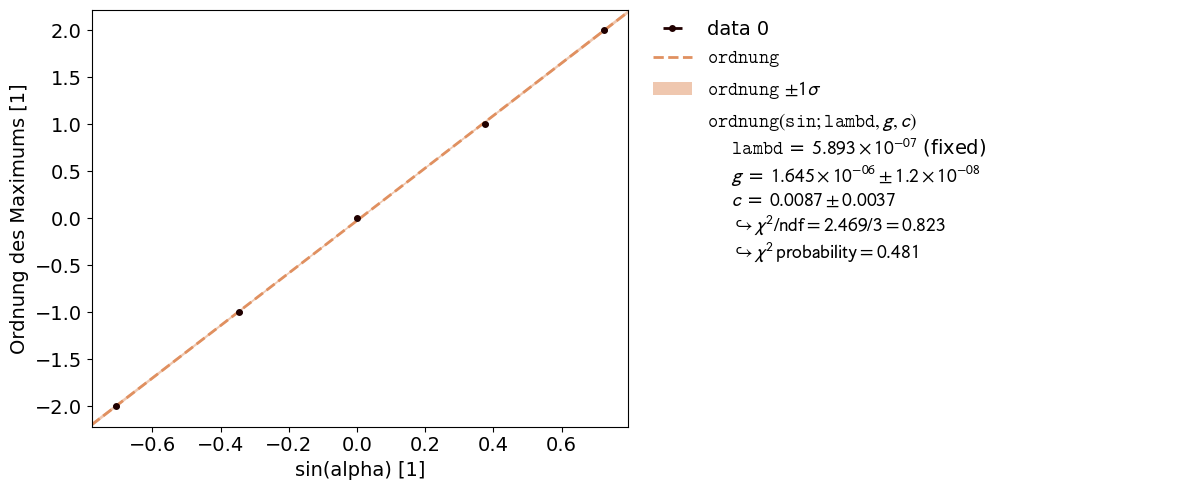

608+/-4


In [29]:
#winkel = np.array([[169,26],[159,1],,[202,4]])[169,26][148,1], [189.5, 30]
winkel = np.array([[225,1], [200.5,14.5], [180,-5], [158.5,29],[134.0,22] ])

winkel = (180-winkel[:,0]+winkel[:,1]/60)*np.pi/180
print(winkel*(180/np.pi))

def ordnung(sin, lambd=600e-9, g=1e-3/600, c=0):
    return (g/lambd)*(sin-c)
gitter600_cont = kafe2.XYContainer(np.sin(winkel),range(-2,3))
gitter600_cont.add_error('x',np.sin(0.5/60))
gitter600_fit = kafe2.Fit(gitter600_cont, ordnung)
gitter600_fit.fix_parameter("lambd", 589.3e-9)
gitter600_fit.do_fit()
gitter600_plot = kafe2.Plot(gitter600_fit)
gitter600_plot.y_label = 'Ordnung des Maximums [1]'
gitter600_plot.x_label = 'sin(alpha) [1]'
gitter600_plot.plot()

plt.show();
gitter=u.ufloat(gitter600_fit.parameter_values[1], gitter600_fit.parameter_errors[1])
gitter600=u.ufloat(gitter600_fit.parameter_values[1], gitter600_fit.parameter_errors[1])
print(1e-3/u.ufloat(gitter600_fit.parameter_values[1], gitter600_fit.parameter_errors[1]))

Die Gitterkonstante wird zu $g=(608\pm4\frac{Striche}{mm})^{-1}$ bestimmt. Diese liegt in einem guten Bereich für die tatsächliche Konstante, jedoch liegt die tatsächliche Konstante nicht im Bereich der Unsicherheit. Bei dieser und den folgenden Messungen spielt die Ausrichtung des Gitters eine wichtige Rolle. Es ist möglich dass dieses nicht rechtwinklig zum Strahlengang positioniert wurde.

### Aufgabe 2.3 Vermessung der $\mathrm{Na}$-D-Doppellinie

 * Bestimmen Sie den Wellenlängenabstand der [$\mathrm{Na}$-D-Doppellinie](https://de.wikipedia.org/wiki/Natrium-D-Linie).
 * Verwenden Sie hierzu das Gitter von **Aufgabe 2.2** und die Feineinstellung der Winkelskala am Spektrometer. Beachten Sie, dass diese Skala zuvor geeicht werden muss.

---

Zunächst wird die Position des nullten Maximums gemessen, welches bei zwei Winkelminuten liegt. Die Vermessung der Doppellinie war von der Durchführung schwierig, da die beiden Maxima nur wenige Minuten auseinanderliegen und die Sichtbarkeit des Kreuzes schlecht ist. Bei Wiederholung des Versuches sollte das Fadenkreuz vielleicht im $45°$ Winkel statt horizontal ausgerichtet werden. Es wird das gleiche Modell wie  oben verwendet. Für die Unsicherheit für die Gitterkonstante wird aus dem obigen Fit verwendet. Für den Wert wird wird der angegebene Wert von $g=(600\frac{Striche}{mm})^{-1}$ verwendet da das Gitter vor dem Versuch neu ausgerichtet werden musste und der Versuch für die ersten Hauptmaxima nachgeholt werden musste. Es wird das selbe Modell wie oben verwendet

$sin(\alpha)=n\,\frac{\lambda}{g}+C \rightarrow n= \frac{g}{\lambda}(sin(\alpha)-C)$

[-4.41333333e+01 -2.03000000e+01  3.33333333e-02  2.05500000e+01
  4.67500000e+01]
[-4.42000000e+01 -2.03333333e+01  3.33333333e-02  2.05833333e+01
  4.68166667e+01]


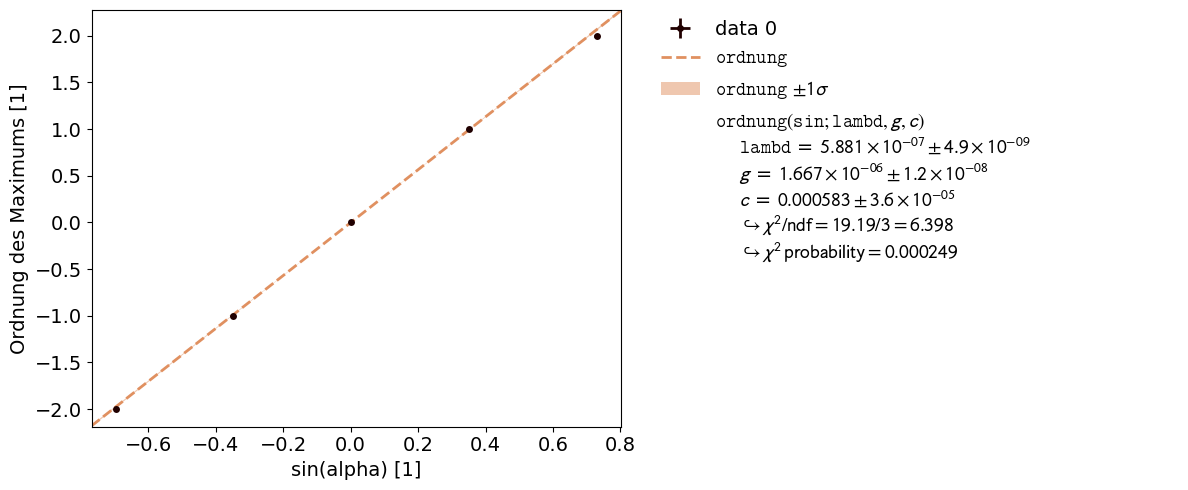

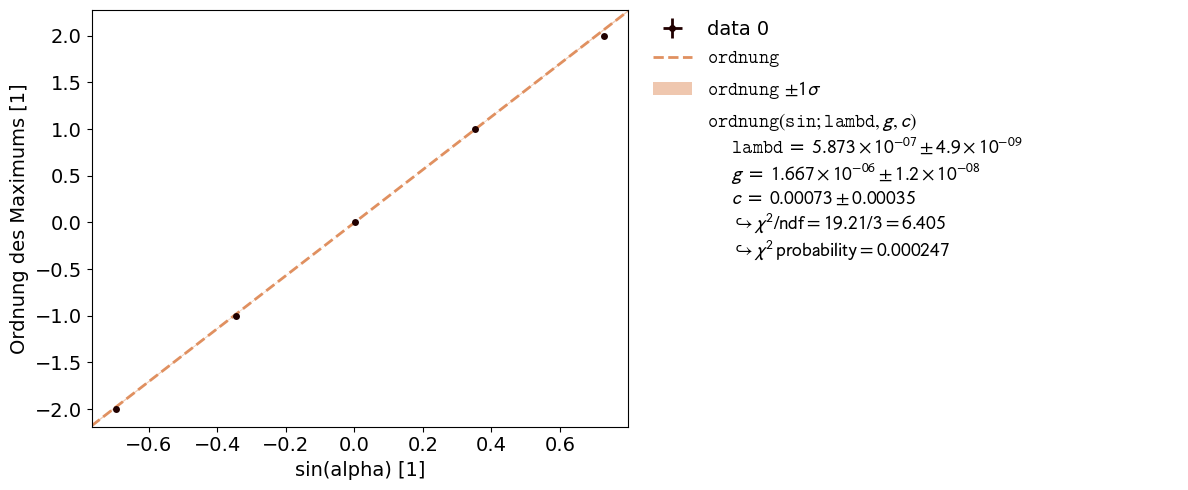

(0.7607588353198695+/-6.9587976040990505,
 -0.5973000000000184,
 588.0546155296199+/-4.921009173143824,
 587.2938566943+/-4.920216744478744,
 588.9951,
 589.5924)

In [30]:
#korrektur der Mittellage um zwei minuten


doppel1 = np.array([(224.5,18),(200.5,10),(180,2),(159.5,5),(133.5,19)])
doppel2 = np.array([(224.5,22),(200.5,12),(180,2),(159.5,3),(133.5,15)])

#korrektur der Mittellage um zwei minuten


# doppel1 = np.array([(224.5,18),(180,2),(133.5,19)])
# doppel2 = np.array([(224.5,22),(180,2),(133.5,15)])

doppel2 = (180-doppel2[:,0]+doppel2[:,1]/60)*np.pi/180
doppel1 = (180-doppel1[:,0]+doppel1[:,1]/60)*np.pi/180

print(doppel2*(180/np.pi))
print(doppel1*(180/np.pi))


lambda1_cont = kafe2.XYContainer(np.sin(doppel1), [-2,-1,0,1,2])
lambda1_cont.add_error('x',np.sin(0.5/60),relative=True)
lambda1_cont.add_error('y',0.0001)
lambda1_fit = kafe2.Fit(lambda1_cont, ordnung)
lambda1_fit.add_parameter_constraint("g",1e-3/600, gitter600_fit.parameter_errors[1])


lambda1_fit.do_fit()
lambda1_plot = kafe2.Plot(lambda1_fit)
lambda1_plot.y_label = 'Ordnung des Maximums [1]'
lambda1_plot.x_label = 'sin(alpha) [1]'
lambda1_plot.plot()

plt.show();


lambda2_cont = kafe2.XYContainer(np.sin(doppel2),[-2,-1,0,1,2])
lambda2_cont.add_error('x',np.sin(0.5/60),relative=True)
lambda2_cont.add_error('y',0.001)
lambda2_fit = kafe2.Fit(lambda2_cont, ordnung)
lambda2_fit.add_parameter_constraint("g",1e-3/600, gitter600_fit.parameter_errors[1])



lambda2_fit.do_fit()
lambda2_plot = kafe2.Plot(lambda2_fit)
lambda2_plot.y_label = 'Ordnung des Maximums [1]'
lambda2_plot.x_label = 'sin(alpha) [1]'
lambda2_plot.plot()


plt.show();

lambda1= u.ufloat(lambda1_fit.parameter_values[0],lambda1_fit.parameter_errors[0])
lambda2= u.ufloat(lambda2_fit.parameter_values[0],lambda2_fit.parameter_errors[0])

(lambda1-lambda2)*1e9, 588.9951-589.5924 , lambda1*1e9,lambda2*1e9,588.9951,589.5924

Für die Differenz der Wellenlängen ergibt sich $\Delta \lambda= 0.76\pm6.96\,nm$. Die Unsicherheit auf den Wert ist sehr hoch und stammt aus der Unsicherheit des Wertes für $g$. Auch die bestimmten Wellenlängen ($\lambda_1=587.29\pm5\,nm \ \lambda_2=588.05\pm5\,nm$) weichen recht stark von dem Literaturwert von $\lambda_1=589\,nm \ \lambda_2=589.59\,nm$ ab. Der ermittelte Wert für die Differenz stimmt jedoch gut mit dem tatsächlichen Wert von $0.597\,nm$ überein. Als Erklärung für die Abweichung kommt ungenaues Ablesen bzw Einstellen oder ein verdrehtes Gitter in betracht. beide Fits haben schlechte $\frac{\chi^2}{ndf}$ und geringe Wahrscheinlichkeiten. 

### Aufgabe 2.4 Bestimmung der Gitterkonstanten $g'$ eines zweiten Gitters

 * Bestimmen Sie die Gitterkonstante $g'$ eines zweiten Gitters mit ${\approx}140$ Strichen pro $\mathrm{mm}$.
 * Beachten Sie die Hinweise zu dieser Teilaufgabe in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Interferenz/doc/Hinweise-Versuchsdurchfuehrung.md) und beantworten Sie in Ihrer Auswertung die folgenden Fragen: 
    1. Das Gitter kann bis bis zu 6. Ordnung mit monoton abnehmender Intensität in jeder Ordnung beobachtet werden. Was lässt sich aus dieser Beobachtung über $b$ schlussfolgern?
    2. Von welcher Ordnung ab ist die $\mathrm{Na}$-D-Linie getrennt beobachtbar?
    3. Ist Ihre Beobachtung konsistent mit dem erwarteten Auflösungsvermögen?

---

Für den Fit wird wieder das gleiche Modell $n= \frac{g}{\lambda}(sin(\alpha)-C)$ verwendet mit Unsicherheiten von $\sim0.5'$ auf den Winkel und $0.1$ auf die Lage der Maxima, da diese nicht immer gut auszumachen waren da das Fadenkreuz nicht immer gut zu sehen war.


[-34.01666667 -28.45       -22.5        -16.38333333 -10.01666667
  -4.58333333  -0.13333333   6.36666667  11.73333333  17.05
  23.1         29.91666667  36.33333333]


c:\Users\jonah\anaconda3\envs\pua\Lib\site-packages\scipy\_lib\_finite_differences.py:145: RuntimeWarning: invalid value encountered in divide
  return val / prod((dx,) * n, axis=0)


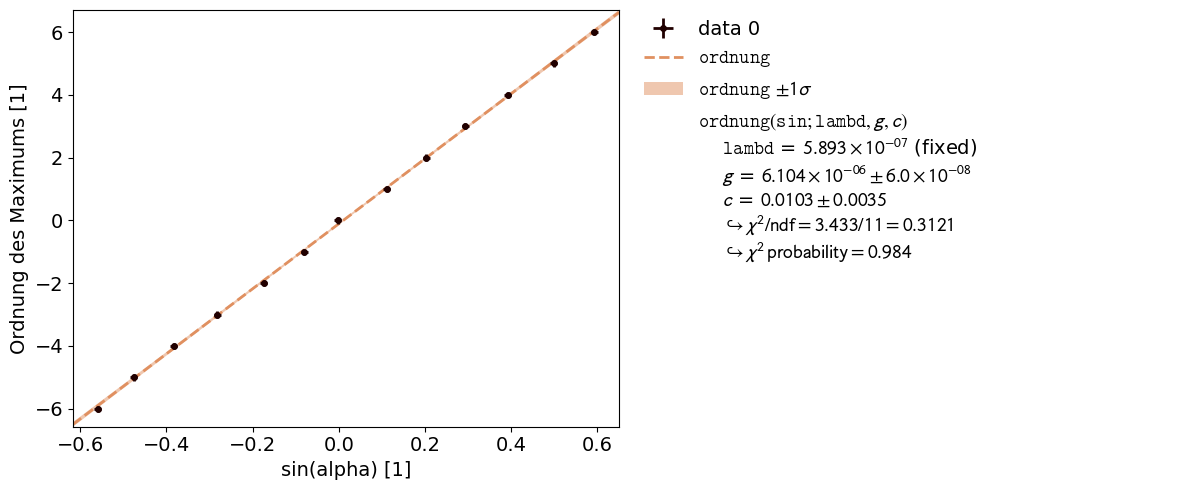

163.8+/-1.6


In [31]:
# Bweichung von mittellage um 8 minuten2
maxima = np.array([(185.0, 25), (190.5, 29), (196.5, 7), (202.5, 0), (208.5, 3), (214.5, 29),(180,-8), (174.0, 22), (168.5, 14), (163.0, 3), (157.0, 6), (150.5, 25), (144, 20)])
maxima =np.sort((180-maxima[:,0]+maxima[:,1]/60)*np.pi/180)
print(maxima*180/np.pi)

gitter2_cont = kafe2.XYContainer(np.sin(maxima),range(-6,7))
gitter2_cont.add_error('x',np.sin(0.5/60))
gitter2_cont.add_error('y',0.1)
gitter2_fit = kafe2.Fit(gitter2_cont, ordnung)
gitter2_fit.fix_parameter("lambd", 589.3e-9)


gitter2_fit.do_fit()
gitter2_plot = kafe2.Plot(gitter2_fit)
gitter2_plot.y_label = 'Ordnung des Maximums [1]'
gitter2_plot.x_label = 'sin(alpha) [1]'
gitter2_plot.plot()

plt.show();
gitter2=u.ufloat(gitter2_fit.parameter_values[1], gitter2_fit.parameter_errors[1])
print(1e-3/gitter2)

In [32]:
del_lambda = 589.59e-9-589.00e-9
N = 589.3e-9/(4*del_lambda)
N, N/163.8

(249.7033898305166, 1.5244407193560232)

Für die Anzahl der Spalte ergibt sich $163.8\pm1.6$ was signifikant von der Angabe von $\sim 140$ abweicht. Entweder ist hier ein grober Messfehler unterlaufen oder die Angabe ist sehr ungenau. Da der Fit mit $\frac{\chi^2}{ndf}=0.3121$ und einer $\chi^2_{\rm{probabiliry}}=0.984$ eigentlich gut ist kann angenommen werden, dass die Angabe schlicht nicht stimmt.



1. Damit das siebte Maximum ausgelöscht wird muss gelten dass $\Delta s_{\rm{Einzzelspalt,dest}}=sin(\alpha)\, b=n\, \lambda=\Delta s_{\rm{Gitter,konst}}=sin(\alpha)\,d=m \, \lambda\rightarrow b=d\frac{m}{n}$ Da nur das siebte Maximum ausgelöscht wird $b=d\frac{m}{7}$ wobei $m<7$ sein muss weil sonst alle Maxima ausgelöscht werden oder $b>d$ wäre.

2. Die Doppelinie wurde ab dem vierten Maximum beobachtet. 

3. Nach $N= \frac{\lambda}{m\,\delta \lambda}$ müssen so $250$ Spalte, bzw $1.52\,mm$ beleuchtet werden. Das stimmt also mit dem Auflösungsvermögen überein.

### Aufgabe 2.5: Linienspektrum der $\mathrm{Zn}$-Spektrallampe

 * Bestimmen Sie die Wellenlängen der vier deutlich erkennbaren Linien der $\mathrm{Zn}$-Spektrallampe. Die Farben sind violettblau, blau, blaugrün und rot. 
 * Begründen und dokumentieren Sie Ihre Wahl der Mittel und der Methode in Ihrer Auswertung.

---

Als Gitter für die Messung wird das Gitter mit $600\frac{Striche}{mm}$ verwendet, da es die Wellenlängen besonders weit auffächert und es so nicht zur überschneidung zwischen den blauen und den roten Linien kommt. Als Fehler für die Winkelmessung wird $1'$ verwendet, für die Ordnung der Maxima $0.01$ um die Breite der Maxima zu berücksichtigen. 

In [33]:
#nulloffset = 5min
zn = np.array([[(214,9),(214.5,5),(215,19),(229.5,15)],[(196,20),(196,30),(196.5,18),(202,28)],[(180,-5),(180,-5),(180,-5),(180,-5)],[(163,27),(163,17),(162.5,30),(157,12)],[(145.5,5),(145,16),(144.5,25),(129,6)]])
#zn = np.array([[(214,9),(214.5,5),(215,19),(229.5,15)],[(163,27),(163,17),(162.5,30),(157,12)]])
zn = (180-zn[:,:,0]+zn[:,:,1]/60)*np.pi/180

def ordnung(sin, lambd=450e-9, g=1e-3/600, c=0):
    return (g/lambd)*(sin-c)

for  n in range (0,4):
    #print(zn[:,n]*180/np.pi)
    lambdas_cont = kafe2.XYContainer(np.sin(zn[:,n]),range(-2,3))
    lambdas_cont.add_error('x', np.sin(1/60))
    lambdas_cont.add_error('y',0.01)
    lambdas_fit = kafe2.Fit(lambdas_cont, ordnung)

    lambdas_fit.add_parameter_constraint("g",gitter600.n,gitter600.s)
    lambdas_fit.do_fit()
    lambdas_plot = kafe2.Plot(lambdas_fit)
    lambdas_plot.y_label = 'Ordnung des Maximums [1]'
    lambdas_plot.x_label = 'sin(alpha) [1]'
    lambdas_plot.plot()
    print(lambdas_fit.parameter_values[0]*1e9,lambdas_fit.parameter_errors[0]*1e9)

#plt.show();


464.49589364337675 9.425384289994836
469.47924192672906 9.441337281959198
477.65494600424705 9.467807760090452
630.9682706978118 10.029117662329813


|Farbe|Ermittelter Wert |Literatur |
|-|-|-|
| violettblau |$464 \pm9\,nm$|$468.01$|
| blau |$469 \pm9\,nm$|$472.21$|
| blaugrün |$478\pm9\,nm$|$481.05$|
| rot |$631 \pm11\,nm$|$636.23$|

Die Werte weichen um ein paar Nanometer von der tatsächlichen Wellenlänge ab, jedoch liegt die tatsächliche Wellenlänge im Bereich der Unsicherheit des ermittelten Wertes. Die $\frac{\chi^2}{ndf}$ Werte aller fits liegen mit $\sim 0.2-0.25$ etwas zu niedrig und die Wahrscheinlichkeit mit $\sim 0.85$ etwas gering, der Fehler auf die Winkelmessung wurde vermutlich etwas zu gering eingeschätzt wurde und ein hohes $\Delta g$ vorliegt.
